**Indian Startup Funding Analysis-Exploratory Data Analysis**

Loading and First Look

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

Load the dataset

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/Naresh312143/mahalingpur-python-ml/refs/heads/main/Indian%20Unicorn%20startups%202023%20updated.csv')

Basic dataset information

In [5]:
df.shape

(102, 8)

In [6]:
df.columns.tolist()

['No.',
 'Company',
 'Sector',
 'Entry Valuation^^ ($B)',
 'Valuation ($B)',
 'Entry',
 'Location',
 'Select Investors']

In [7]:
df.head()

,No.,Company,Sector,Entry Valuation^^ ($B),Valuation ($B),Entry,Location,Select Investors
0,1,InMobi,Adtech - Mobile Ads,1.0,1.0,Sep/2011,Bangalore/Singapore,"KPCB, Sherpalo Ventures, SoftBank"
1,2,Flipkart^,E-Commerce,1.0,37.6,Feb/2012,Bangalore/Singapore,"Accel, Tiger Global, Naspers, SoftBank, Tencent"
2,3,Mu Sigma,SaaS - Analytics,1.0,1.5,Feb/2013,Bangalore/Chicago,"Accel, Sequoia Capital, General Atlantic"
3,4,Snapdeal*,E-Commerce,1.8,2.4,Oct/2014,Delhi,"Kalaari Capital, Nexus Ventures, Bessemer, Sof..."
4,5,PayTM^,Fintech - Payments & Wallet,1.7,16.0,Feb/2015,Noida,"Saama Capital, Elevation Capital, Alibaba, Ber..."


**Data Quality Assessment**

Check data types and missing values

In [8]:
df.dtypes

,0
No.,int64
Company,object
Sector,object
Entry Valuation^^ ($B),float64
Valuation ($B),float64
Entry,object
Location,object
Select Investors,object


In [9]:
df.isnull().sum()

,0
No.,0
Company,0
Sector,0
Entry Valuation^^ ($B),0
Valuation ($B),0
Entry,0
Location,0
Select Investors,0


Check for Duplicates

In [10]:
df.duplicated().sum()


np.int64(0)

Basic statistics

In [11]:
df.describe()

,No.,Entry Valuation^^ ($B),Valuation ($B)
count,102.000000,102.000000,102.000000
mean,51.500000,1.547549,3.398020
std,29.588849,1.138013,4.710657
min,1.000000,1.000000,0.568000
25%,26.250000,1.000000,1.200000
50%,51.500000,1.200000,1.850000
75%,76.750000,1.582500,3.475000
max,102.000000,10.000000,37.600000


**Data Preprocessing**

Clean column names

In [12]:
df.columns = df.columns.str.strip()

Convert Entry column to datetime

In [13]:
df['Entry_Date'] = pd.to_datetime(df['Entry'], format='%b/%Y')
df['Entry_year'] = df['Entry_Date'].dt.year
df.head()

,No.,Company,Sector,Entry Valuation^^ ($B),Valuation ($B),Entry,Location,Select Investors,Entry_Date,Entry_year
0,1,InMobi,Adtech - Mobile Ads,1.0,1.0,Sep/2011,Bangalore/Singapore,"KPCB, Sherpalo Ventures, SoftBank",2011-09-01,2011
1,2,Flipkart^,E-Commerce,1.0,37.6,Feb/2012,Bangalore/Singapore,"Accel, Tiger Global, Naspers, SoftBank, Tencent",2012-02-01,2012
2,3,Mu Sigma,SaaS - Analytics,1.0,1.5,Feb/2013,Bangalore/Chicago,"Accel, Sequoia Capital, General Atlantic",2013-02-01,2013
3,4,Snapdeal*,E-Commerce,1.8,2.4,Oct/2014,Delhi,"Kalaari Capital, Nexus Ventures, Bessemer, Sof...",2014-10-01,2014
4,5,PayTM^,Fintech - Payments & Wallet,1.7,16.0,Feb/2015,Noida,"Saama Capital, Elevation Capital, Alibaba, Ber...",2015-02-01,2015


In [14]:
df.dtypes

,0
No.,int64
Company,object
Sector,object
Entry Valuation^^ ($B),float64
Valuation ($B),float64
Entry,object
Location,object
Select Investors,object
Entry_Date,datetime64[ns]
Entry_year,int32


create valuation growth metric

In [15]:
df['Valuation_Growth'] = df['Valuation ($B)']/df['Entry Valuation^^ ($B)']
df.head()

,No.,Company,Sector,Entry Valuation^^ ($B),Valuation ($B),Entry,Location,Select Investors,Entry_Date,Entry_year,Valuation_Growth
0,1,InMobi,Adtech - Mobile Ads,1.0,1.0,Sep/2011,Bangalore/Singapore,"KPCB, Sherpalo Ventures, SoftBank",2011-09-01,2011,1.000000
1,2,Flipkart^,E-Commerce,1.0,37.6,Feb/2012,Bangalore/Singapore,"Accel, Tiger Global, Naspers, SoftBank, Tencent",2012-02-01,2012,37.600000
2,3,Mu Sigma,SaaS - Analytics,1.0,1.5,Feb/2013,Bangalore/Chicago,"Accel, Sequoia Capital, General Atlantic",2013-02-01,2013,1.500000
3,4,Snapdeal*,E-Commerce,1.8,2.4,Oct/2014,Delhi,"Kalaari Capital, Nexus Ventures, Bessemer, Sof...",2014-10-01,2014,1.333333
4,5,PayTM^,Fintech - Payments & Wallet,1.7,16.0,Feb/2015,Noida,"Saama Capital, Elevation Capital, Alibaba, Ber...",2015-02-01,2015,9.411765


Extract primary city(before '/)

In [16]:
df['Primary_City'] = df['Location'].str.split('/').str[0]
df.head()

,No.,Company,Sector,Entry Valuation^^ ($B),Valuation ($B),Entry,Location,Select Investors,Entry_Date,Entry_year,Valuation_Growth,Primary_City
0,1,InMobi,Adtech - Mobile Ads,1.0,1.0,Sep/2011,Bangalore/Singapore,"KPCB, Sherpalo Ventures, SoftBank",2011-09-01,2011,1.000000,Bangalore
1,2,Flipkart^,E-Commerce,1.0,37.6,Feb/2012,Bangalore/Singapore,"Accel, Tiger Global, Naspers, SoftBank, Tencent",2012-02-01,2012,37.600000,Bangalore
2,3,Mu Sigma,SaaS - Analytics,1.0,1.5,Feb/2013,Bangalore/Chicago,"Accel, Sequoia Capital, General Atlantic",2013-02-01,2013,1.500000,Bangalore
3,4,Snapdeal*,E-Commerce,1.8,2.4,Oct/2014,Delhi,"Kalaari Capital, Nexus Ventures, Bessemer, Sof...",2014-10-01,2014,1.333333,Delhi
4,5,PayTM^,Fintech - Payments & Wallet,1.7,16.0,Feb/2015,Noida,"Saama Capital, Elevation Capital, Alibaba, Ber...",2015-02-01,2015,9.411765,Noida


Count number of investors

In [17]:
df['Investor_Count'] = df['Select Investors'].str.count(',')+1
df.head()

,No.,Company,Sector,Entry Valuation^^ ($B),Valuation ($B),Entry,Location,Select Investors,Entry_Date,Entry_year,Valuation_Growth,Primary_City,Investor_Count
0,1,InMobi,Adtech - Mobile Ads,1.0,1.0,Sep/2011,Bangalore/Singapore,"KPCB, Sherpalo Ventures, SoftBank",2011-09-01,2011,1.000000,Bangalore,3
1,2,Flipkart^,E-Commerce,1.0,37.6,Feb/2012,Bangalore/Singapore,"Accel, Tiger Global, Naspers, SoftBank, Tencent",2012-02-01,2012,37.600000,Bangalore,5
2,3,Mu Sigma,SaaS - Analytics,1.0,1.5,Feb/2013,Bangalore/Chicago,"Accel, Sequoia Capital, General Atlantic",2013-02-01,2013,1.500000,Bangalore,3
3,4,Snapdeal*,E-Commerce,1.8,2.4,Oct/2014,Delhi,"Kalaari Capital, Nexus Ventures, Bessemer, Sof...",2014-10-01,2014,1.333333,Delhi,5
4,5,PayTM^,Fintech - Payments & Wallet,1.7,16.0,Feb/2015,Noida,"Saama Capital, Elevation Capital, Alibaba, Ber...",2015-02-01,2015,9.411765,Noida,4


**Univariate Analysis**

Valuation distribution analysis

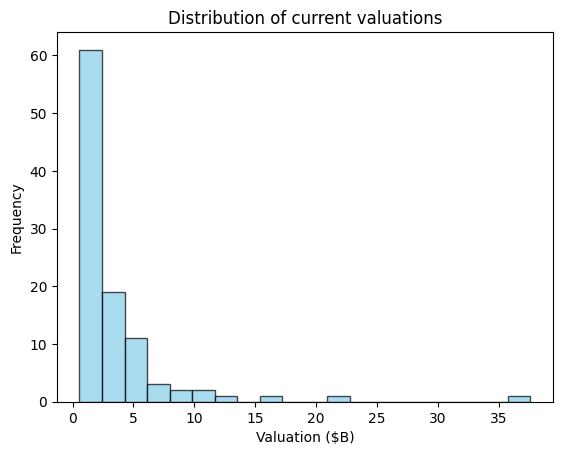

In [18]:
plt.hist(df['Valuation ($B)'], bins=20,alpha=0.7,color='skyblue',edgecolor='black')
plt.xlabel('Valuation ($B)')
plt.ylabel('Frequency')
plt.title('Distribution of current valuations')
plt.show()

Key Insights:



*   Highly right-skewed distribution(few mega-unicorns)
*   Median valuation around 2-3B-Flipkart Domination With 37.6B Valuation
*   Most Unicorns clustured in $1-5B range






**Sector Analysis**

Sector distribution

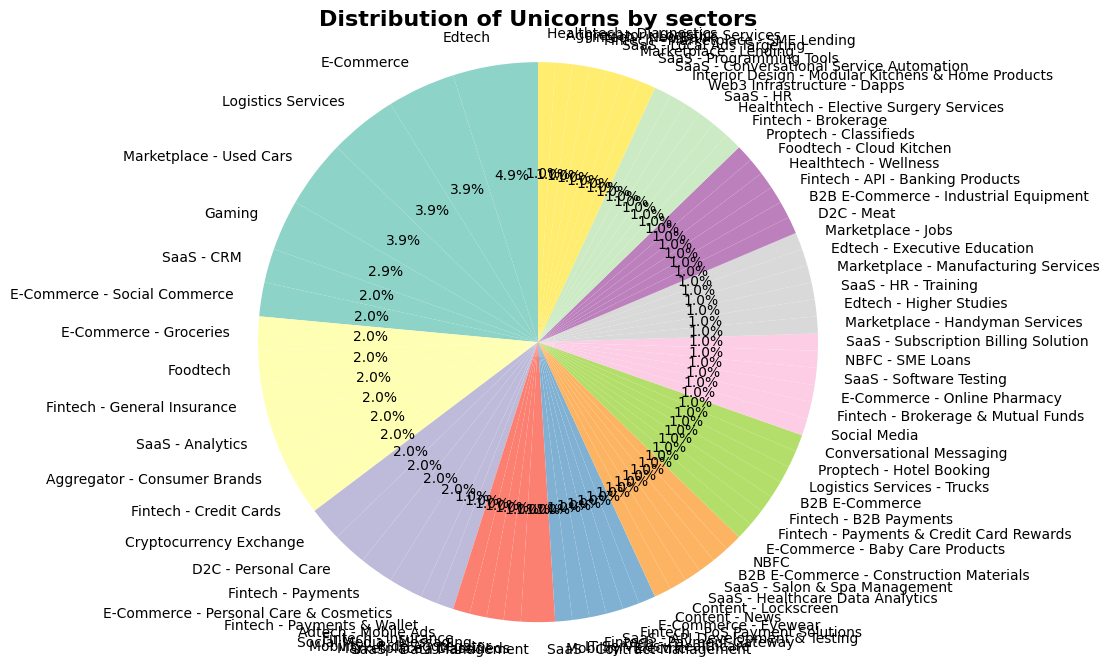

In [19]:
plt.figure(figsize=(12,8))


sector_counts = df['Sector'].value_counts()
colors = plt.cm.Set3(np.linspace(0,1,len(sector_counts)))

plt.pie(sector_counts,labels=sector_counts.index,colors=colors,autopct='%1.1f%%',startangle=90)
plt.title('Distribution of Unicorns by sectors',fontsize=16,fontweight='bold')
plt.axis('equal')
plt.show()

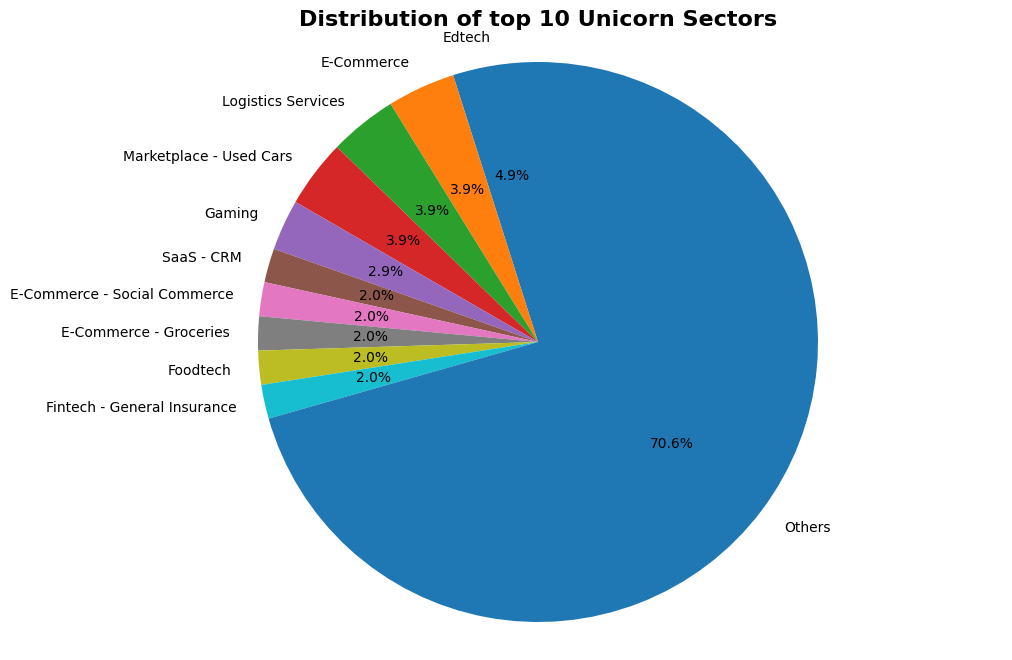

In [20]:
def display_top_k_sectors(df,k):
  sector_counts = df['Sector'].value_counts()

  if k < len(sector_counts):
    top_sectors = sector_counts.head(k)
    others_sectors_count = sector_counts.iloc[k:].sum()
    top_sectors['Others'] = others_sectors_count
  else:
    top_sectors = sector_counts
  plt.figure(figsize=(12,8))
  colors = plt.cm.Set3(np.linspace(0,1,len(top_sectors)))

  plt.pie(top_sectors.values,labels=top_sectors.index,autopct='%1.1f%%',startangle=90)
  plt.title(f'Distribution of top {k} Unicorn Sectors',fontsize=16,fontweight='bold')
  plt.axis('equal')
  plt.show()

display_top_k_sectors(df,10)

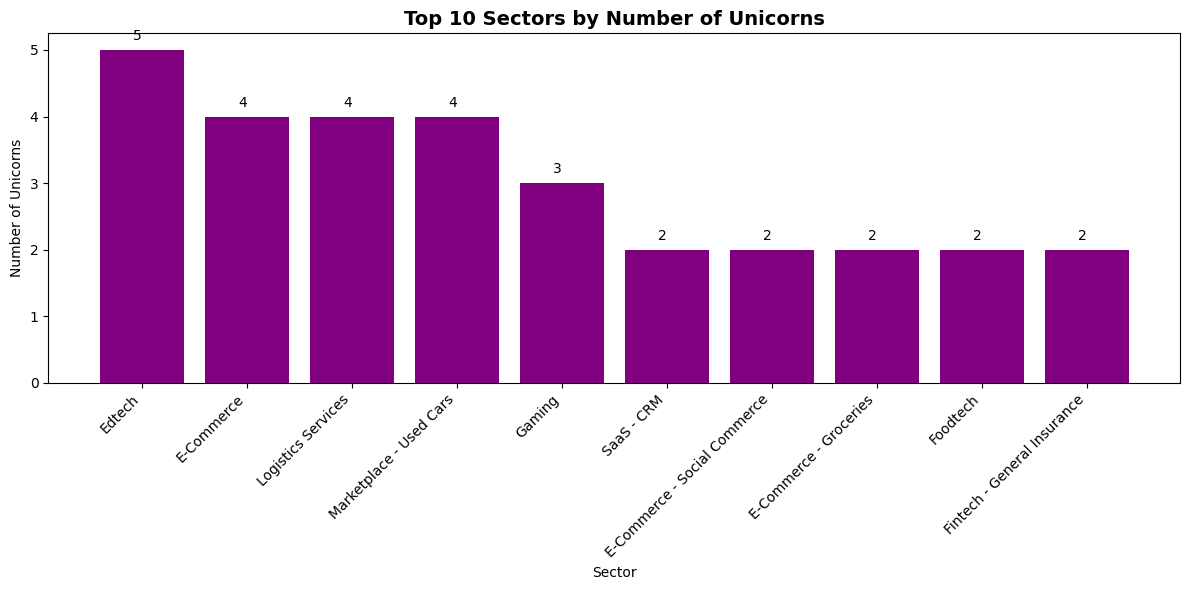

In [21]:
plt.figure(figsize=(12,6))
top_sectors = sector_counts.head(10)
bars = plt.bar(range(len(top_sectors)),top_sectors.values,color='purple')
plt.title('Top 10 Sectors by Number of Unicorns',fontsize=14,fontweight='bold')
plt.xlabel('Sector')
plt.ylabel('Number of Unicorns')
plt.xticks(range(len(top_sectors)),top_sectors.index,rotation=45,ha='right')

for bar, value in zip(bars,top_sectors.values):
  plt.text(bar.get_x()+bar.get_width()/2,bar.get_height()+0.1,str(value),ha='right',va='bottom')
plt.tight_layout()
plt.show()

Key Insights:



*   EdTEch leads with highest number of unicorns
*   E-Commerce and SaaS are major contributors
*   Edtech emergence as significant sector
*   Diversification across multiple sectors




**Geographic Distribution**

City-wise distribution

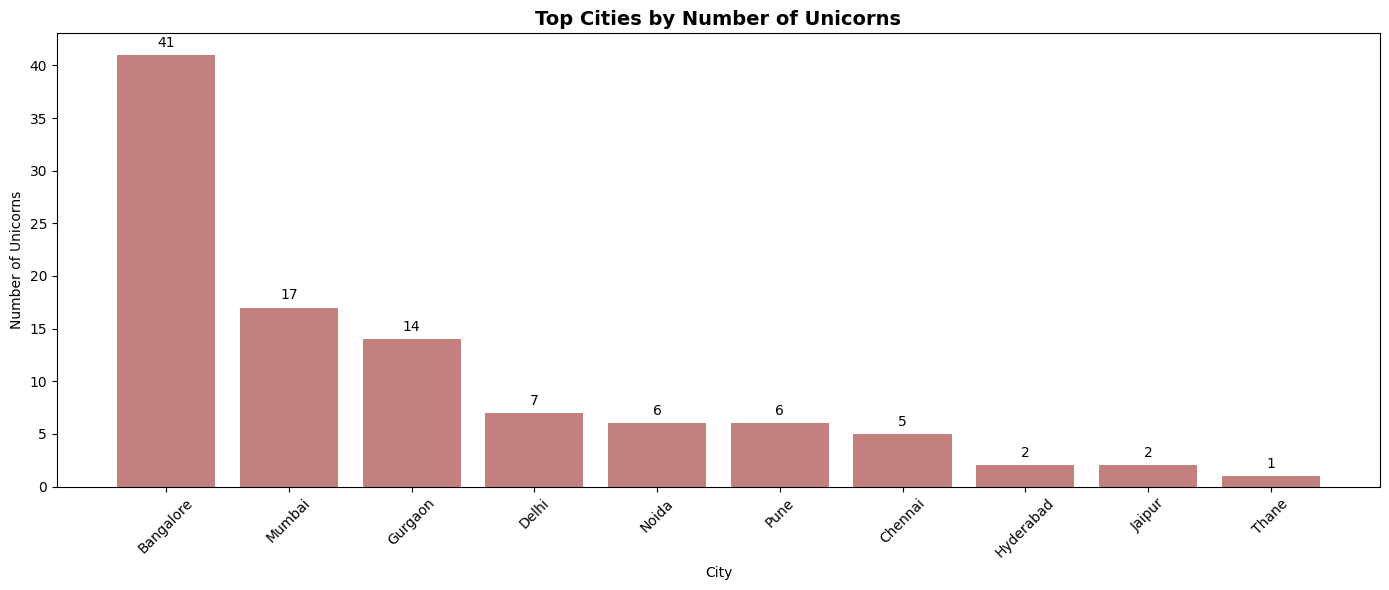

In [29]:
plt.figure(figsize=(14,6))

city_counts = df['Primary_City'].value_counts().head(10)
bars = plt.bar(city_counts.index,city_counts.values,color='darkred',alpha=0.5)
plt.title('Top Cities by Number of Unicorns',fontsize=14,fontweight='bold')
plt.xlabel('City')
plt.ylabel('Number of Unicorns')
plt.xticks(rotation=45)


for bar,value in zip(bars,city_counts.values):
  plt.text(bar.get_x()+bar.get_width()/2,bar.get_height()+0.5,str(value),ha='center',va='bottom')
plt.tight_layout()
plt.show()

Create a summary table

In [23]:
city_summary = df.groupby('Primary_City').agg({
    'Valuation ($B)':['count','sum','mean'],
    'Entry_year':['min','max']
}).round(2)
city_summary_columns = ['Count','Total_Valuation','Avg_Valuation','First_Entry','Last_Entry']
city_summary.head(10)


Valuation ($B)               Entry_year      
                      count     sum  mean        min   max
Primary_City                                              
Bangalore                41  185.20  4.52       2011  2022
Chennai                   5   12.20  2.44       2018  2022
Delhi                     7   15.53  2.22       2014  2022
Goa                       1    1.53  1.53       2022  2022
Gurgaon                  14   37.94  2.71       2015  2022
Hyderabad                 2    2.50  1.25       2020  2022
Jaipur                    2    2.90  1.45       2021  2022
Mumbai                   17   42.80  2.52       2018  2022
Noida                     6   30.90  5.15       2015  2022
Pune                      6   12.60  2.10       2019  2022

**Key Insights:**



*  Bangalore dominates with highest number of unicorns
*  Mumbai and Gurgaon are other major hubs
*  Geographic concentration in tech cities
*  Bangalore leads in both count and total valuation





**Temporal Analysis**

Entry year trends

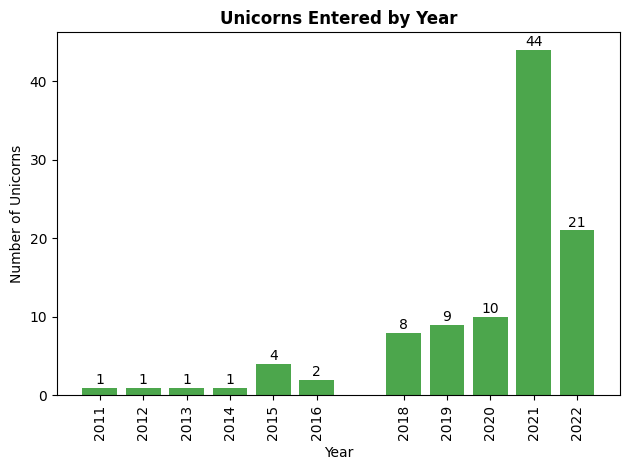

In [30]:
yearly_entries = df['Entry_year'].value_counts().sort_index()
bars = plt.bar(yearly_entries.index,yearly_entries.values,color='green',alpha=0.7)
plt.title('Unicorns Entered by Year',fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Number of Unicorns')
plt.xticks(yearly_entries.index,rotation=90)


for bar,value in zip(bars,yearly_entries.values):
  plt.text(bar.get_x()+bar.get_width()/2,bar.get_height()+0.1,str(value),ha='center',va='bottom')
plt.tight_layout()
plt.show()

Cumulative Unicorns

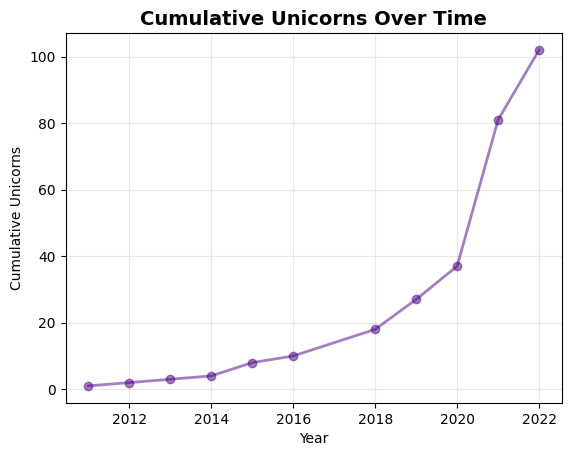

In [25]:
cumulative = yearly_entries.cumsum()
plt.plot(cumulative.index,cumulative.values,marker='o',linewidth=2,color='indigo',alpha=0.5)
plt.title('Cumulative Unicorns Over Time',fontsize=14,fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Cumulative Unicorns')
plt.grid(True,alpha=0.3)
plt.show()

Average valuation by year

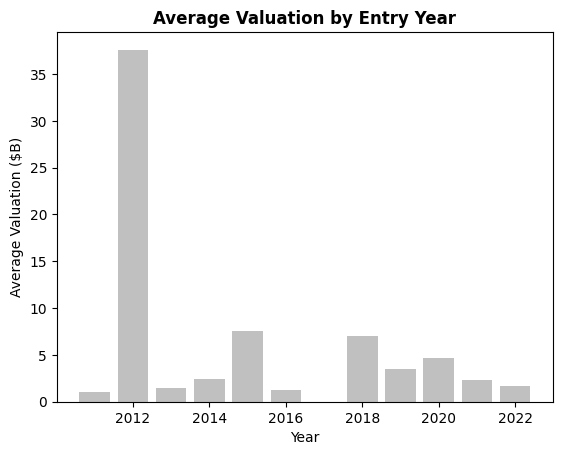

In [26]:
avg_val_by_year = df.groupby('Entry_year')['Valuation ($B)'].mean()
plt.bar(avg_val_by_year.index,avg_val_by_year.values,color='silver')
plt.title('Average Valuation by Entry Year',fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Average Valuation ($B)')
plt.show()

Selector evolution over time

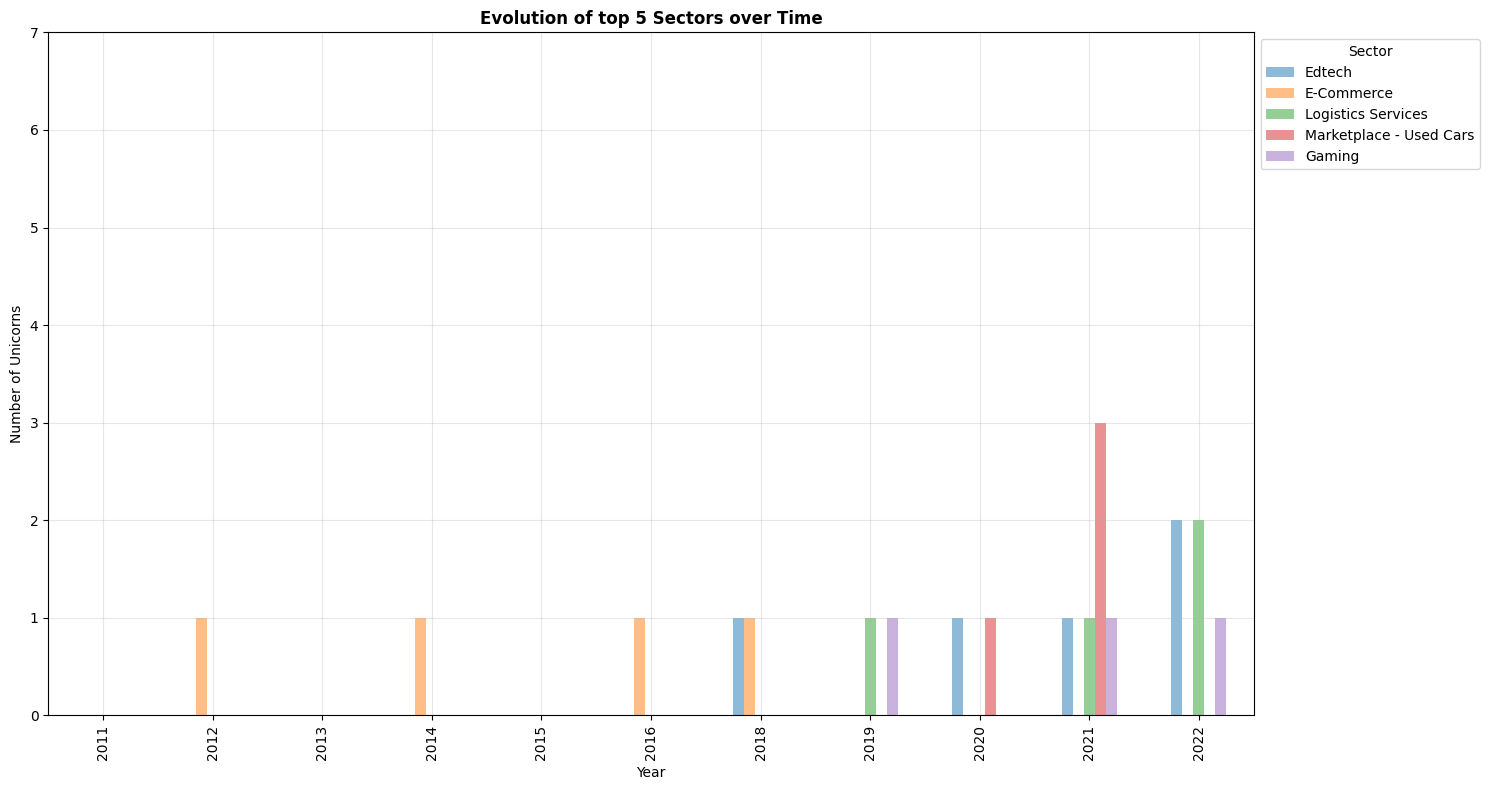

In [27]:
def display_k_sectors_evolution(df,k):
  sector_year = df.groupby(['Entry_year','Sector']).size().unstack(fill_value=0)
  top_k_sectors_names = df['Sector'].value_counts().head(k).index.tolist()
  sector_year = sector_year[top_k_sectors_names]

  plt.figure(figsize=(15,8))
  sector_year.plot(kind='bar',alpha=0.5,ax=plt.gca())

  plt.title(f'Evolution of top {k} Sectors over Time',fontweight='bold')
  plt.xlabel('Year')
  plt.ylabel('Number of Unicorns')
  plt.legend(title='Sector',bbox_to_anchor=(1,1),loc='upper left')
  plt.yticks(range(0,sector_year.values.max()+5))
  plt.grid(True,alpha=0.3)
  plt.tight_layout()
  plt.show()

#call the function with k=5
display_k_sectors_evolution(df,5)



**Bivariate Analysis**

Valuation VS Sector Analysis

Average valuation by sector

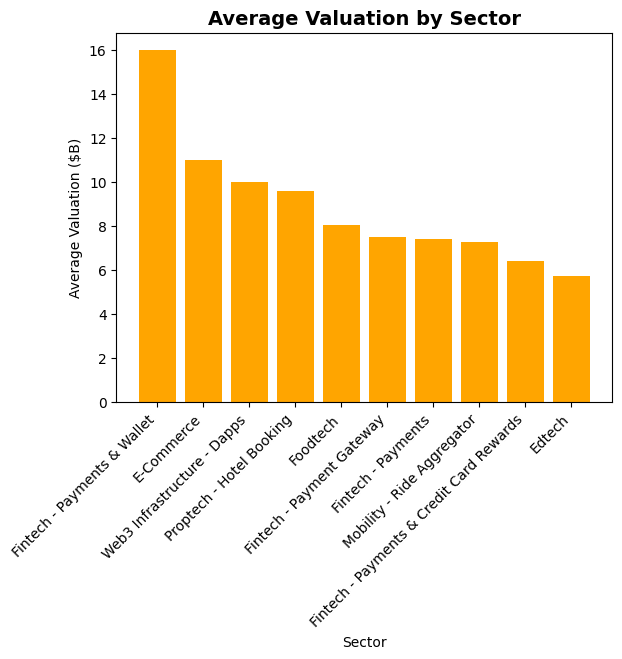

In [32]:
avg_valuation = df.groupby('Sector')['Valuation ($B)'].mean()
avg_valuation = avg_valuation.sort_values(ascending=False).head(10)
bars = plt.bar(range(len(avg_valuation)),avg_valuation.values,color='orange')
plt.title('Average Valuation by Sector',fontsize=14,fontweight='bold')
plt.xlabel('Sector')
plt.ylabel('Average Valuation ($B)')
plt.xticks(range(len(avg_valuation)),avg_valuation.index,rotation=45,ha='right')
plt.show()

Sector vs Count vs Total Valuation

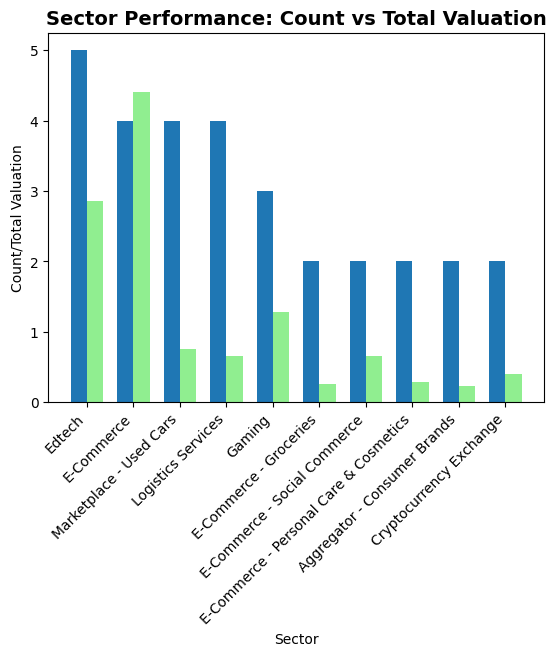

In [33]:
sector_summary = df.groupby('Sector').agg({'Valuation ($B)':['count','sum']}).round(2)
sector_summary.columns = ['Count','Total_Valuation']
sector_summary = sector_summary.sort_values(by='Count',ascending=False).head(10)
x = np.arange(len(sector_summary))
width = 0.35
plt.bar(x-width/2,sector_summary['Count'],width,label='Count')
plt.bar(x+width/2,sector_summary['Total_Valuation']/10,width,label='Total Valuation',color='lightgreen')
plt.title('Sector Performance: Count vs Total Valuation',fontsize=14,fontweight='bold')
plt.xlabel('Sector')
plt.ylabel('Count/Total Valuation')
plt.xticks(x,sector_summary.index,rotation=45,ha='right')
plt.show()


**Key Insights:**



*   E-Commerce shows highest average valuations
*   Fintech has most unicorns but moderate average valuation
*  Web3 and some niche sectors show high growth multiples
*   Sector maturity affects valuation patterns





**Geographic vs.Valuation Analysis**

Average valuation by city

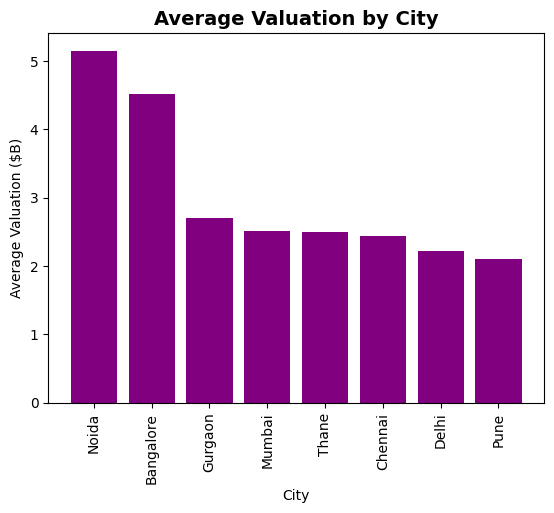

In [34]:
city_valuation = df.groupby('Primary_City')['Valuation ($B)'].mean()
city_valuation = city_valuation.sort_values(ascending=False).head(8)

bars = plt.bar(city_valuation.index,city_valuation.values,color='purple')
plt.title('Average Valuation by City',fontsize=14,fontweight='bold')
plt.xlabel('City')
plt.ylabel('Average Valuation ($B)')
plt.xticks(rotation=90)
plt.show()

City vs count vs Total Valuation

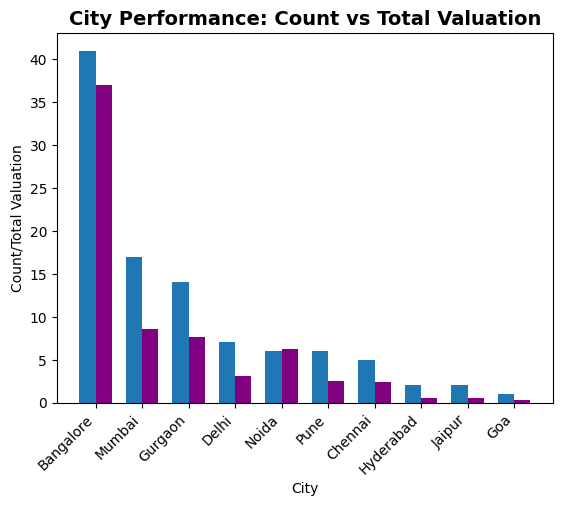

In [36]:
city_summary = df.groupby('Primary_City').agg({'Valuation ($B)':['count','sum']}).round(2)
city_summary.columns = ['Count','Total_Valuation']
city_summary = city_summary.sort_values(by='Count',ascending=False).head(10)

x = np.arange(len(city_summary))
width = 0.35

plt.bar(x-width/2,city_summary['Count'],width,label='Count')
plt.bar(x+width/2,city_summary['Total_Valuation']/5,width,label='Total Valuation',color='purple')
plt.title('City Performance: Count vs Total Valuation',fontsize=14,fontweight='bold')
plt.xlabel('City')
plt.ylabel('Count/Total Valuation')
plt.xticks(x,city_summary.index,rotation=45,ha='right')
plt.show()

Investor and Time-based analysis

Number of investors vs valuation

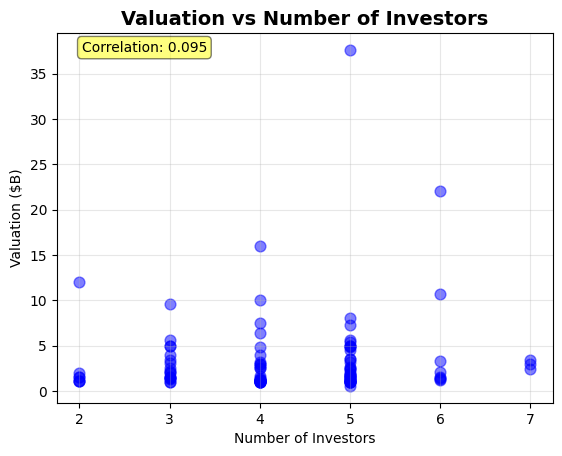

In [38]:
plt.scatter(df['Investor_Count'],df['Valuation ($B)'],color='blue',alpha=0.5,s=60)
plt.title('Valuation vs Number of Investors',fontsize=14,fontweight='bold')
plt.xlabel('Number of Investors')
plt.ylabel('Valuation ($B)')
plt.grid(True,alpha=0.3)
correlation = df['Investor_Count'].corr(df['Valuation ($B)'])
plt.text(0.05,0.95,f'Correlation: {correlation:.3f}',transform=plt.gca().transAxes,bbox=dict(boxstyle="round,pad=0.3",facecolor = "yellow",alpha=0.5))
plt.show()

Most active investors

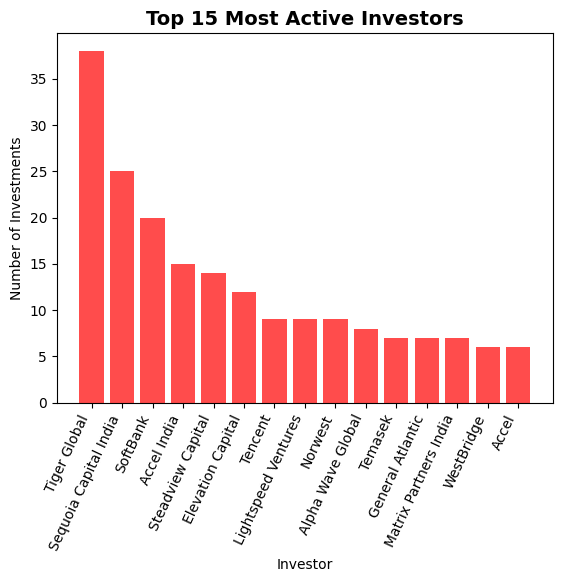

In [40]:
all_investors = []
for investors in df['Select Investors'].dropna():
  all_investors.extend([inv.strip() for inv in investors.split(',')])
investor_counts = pd.Series(all_investors).value_counts().head(15)
bars = plt.bar(range(len(investor_counts)),investor_counts.values,color='red',alpha=0.7)
plt.title('Top 15 Most Active Investors',fontsize=14,fontweight='bold')
plt.xlabel('Investor')
plt.ylabel('Number of Investments')
plt.xticks(range(len(investor_counts)),investor_counts.index,rotation=65,ha='right')
plt.show()

Entry year vs Investor count

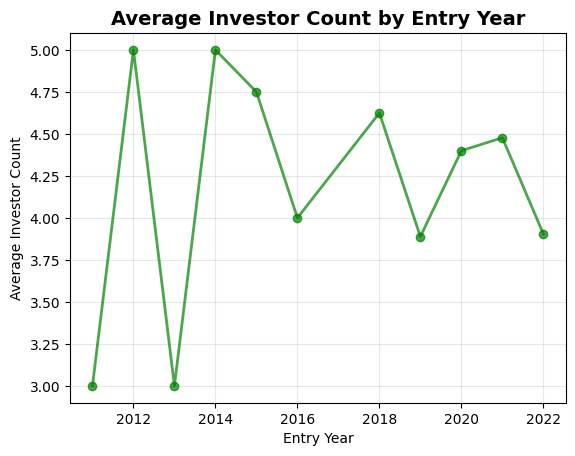

In [41]:
year_investor = df.groupby('Entry_year')['Investor_Count'].mean()
plt.plot(year_investor.index,year_investor.values,marker='o',linewidth=2,color='green',alpha=0.7)
plt.title('Average Investor Count by Entry Year',fontsize=14,fontweight='bold')
plt.xlabel('Entry Year')
plt.ylabel('Average Investor Count')
plt.grid(True,alpha=0.3)
plt.show()

Investor count distribution

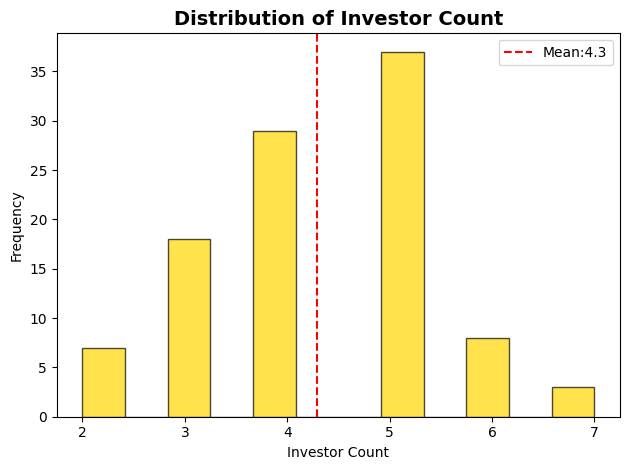

In [42]:
plt.hist(df['Investor_Count'],bins=12,alpha=0.7,color='gold',edgecolor='black')
plt.title('Distribution of Investor Count',fontsize=14,fontweight='bold')
plt.xlabel('Investor Count')
plt.ylabel('Frequency')
plt.axvline(df['Investor_Count'].mean(),color='red',linestyle='--',label=f'Mean:{df["Investor_Count"].mean():.1f}')
plt.legend()
plt.tight_layout()
plt.show()